# Dijkstra's Algorithm

## Introduction

In mathematics, we were introduced with the term **sequence**, a collection of infinite objects where it follows a certain set of rules or pattern. The concept of sequence plays a vital role in building the foundation for calculus, where the idea of convergence, divergence, limits, and integrals were made to change how we percieve the word "exactness". However, what if we apply that notion into a set of *finite actions* instead of infinite objects? 
In this case, this is how the field of mathematics define the word **"algorithm"**.

Despite the fact that algorithms were invented by mathematicians, this concept is highly applicable in the field of computer science. For example, say that the Internet is down and you have a telephone directory in your hand. You want to make a call to Terence Tao because he has the clue to solve the Millennium Prize Problems that you have been working on for the past few months. *What's the minimum number of filps to find his number in a book that is  10000 pages long, and how would you do it?* Most people would take at least 10 flips to find the letter T on the corner of the book and another 10 or more flips to find the name Terence Tao amongst the names that starts with a T. However, is it possible to find his number under 10 flips? The answer is yes, and the way we do this is by using the idea behind an algorithm called **"binary search algorithm"**.

To put it simply, we open a book on a random page and check the letter at the corner of the book. Lexicographically wise, if the letter at the corner comes before the letter T, we tear the book in half and ignore all of the pages that comes before the letter T. If not, we repeat this action on the right side of the book. By repeatedly doing so, we cut down the book by half for every page we flip over and we will stop doing this until we have one page remaining. Of course, that final page is the one that has Terence Tao's home number. So how many flips did it took to find his number in this case? Since we always tear the book in half for every page we flipped, the number of flips we have done is: $log_2{10000} \approx 13$ flips, which is a significant improvement compared to how we traditionally search through the book.

Now say that he wants to meet you in California, but you are in New York at the moment. **So how can you fly there in the shortest distance possible?** In the scope of this project, we will be building a graph that represents the city in the United States and introducing an algorithm that Google Maps has used to make transportation more convenient in the modern age. Specifically, the algorithm we will be introducting is called **Dijkstra's Algorithm**, and the purpose of this algorithm is to **find the shortest path** from one location to another.

## Goals

In this project, we will be focusing on building a graph that repesents a map of cities across the United States by creating a list of edges (or a list of all possible paths). Afterwards, we will use that list of edges to generate an adjacency map, and build the algorithm that helps us to get the shortest path between two cities.

Three different sections will be divided in this report and each of them will be used to highlight the purpose and usefulness of Dijkstra's Algorithm.

The first section will focus on building a map of cities by creating a list of edges, which is a list of all possible paths from one city to another. In this case, an edge is considered to be an object where it contains the name of the starting point, the name of the destination, the name of the path, and the distance between the two points. Once the object is created, we will build a list of all possible paths that corresponds to how the map is depicted.

The second section is about transforming the list of edges into an adjacency map, which is a dictionary where the key is the name of all the nodes in the map and the value is the list of edges with their corresponding starting nodes. The purpose of building the adjacency map is to improve the runtime of the algorithm. In other words, the shortest path will be generated a lot quicker when using the adjacency map instead of the list of edges.

The third and final section will focus on implementing Dijkstra's Algorithm to generate the shortest path between two destinations. The output of this algorithm will consist of the names of the paths that form the shortest path from one location to another.

## Section 0: Importing the Priority Queue

Before we get started on the project, we first need to import the Priority Queue, a data structure that is essential for the implementation of Dijkstra's Algorithm.

To understand what a Priority Queue is, we first need to understand what a queue is. A queue, as the name speaks for itself, is a special type of list where you can only access its elements by removing the front element of the list and add new elements at the back of the list. However, a priority queue is a type of queue where all of the elements in the queue is sorted in a monotonically increasing order. For example, inserting the numbers $4,2,1,3,5$ in sequence would result in the normal queue appearing as $[4,2,1,3,5]$, whereas the priority queue would be $[1,2,3,4,5]$. Therefore, if we access the element at the front of the normal queue, it would return $4$ while the priority queue would return $1$.

In [1]:
from queue import PriorityQueue

## Section 1: Building the Graph

In this first section, I will be building the list of edges as a representation of the graph. In this case, an edge of the graph will be an object called ```Edge``` and it has the following properties:

* The name of the starting node, which is the name of the city
* The name of the destination node, which is also the name of the city
* The name of the path
* The distance between two nodes, which is the distance between two cities.

Since we want to create a new path for every time we call the object, we will use a constructor to do so. The constructor will have all of the mentioned properties as the parameter and we will use those parameter to define the values in the object.

In [2]:
# Build a class that represent an edge of a graph, which is the path between two cites.
class Edge:
    def __init__(self, start, end, distance):              # Initialize a constructor for every new path we create.
        self.start = start                                 # Define the starting node.
        self.end = end                                     # Define the destination node.
        self.streetName = str(start) + " to " + str(end)   # Define the name of the path between two nodes.
        self.distance = distance                           # Define the distance between two nodes.

Once we are finished with building a edge class, we will now build the graph as the list of edges, which is a list of all possible paths in a graph. For the sake of clarity, I will be building an example graph to illustrate how the adjacency map is built and how algorithm runs:

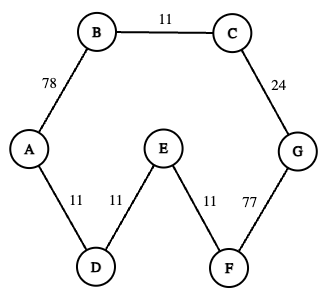

In [3]:
Graph = []                           # Initialize a list of edges.
Graph.append(Edge("A", "B", 78))     # Add a path from A to B with a distance of 78.
Graph.append(Edge("B", "C", 11))     # Add a path from B to C with a distance of 11.
Graph.append(Edge("C", "G", 24))     # Add a path from C to G with a distance of 24.
Graph.append(Edge("A", "D", 11))     # Add a path from A to D with a distance of 11.
Graph.append(Edge("D", "E", 11))     # Add a path from D to E with a distance of 11.
Graph.append(Edge("E", "F", 11))     # Add a path from E to F with a distance of 11.
Graph.append(Edge("F", "G", 77))     # Add a path from F to G with a distance of 77.

## Section 2: Building the Adjacency List

In this second section, I will now focus on building an adjacency map based on the example graph that I had created in the previous section. As mentioned in the goal of the project, the adjacency map is a dictionary where the key is the name of all the nodes in the graph and the value is the list of edges with their corresponding starting nodes. Based on the description of the example graph, the adjacency map would look as such:

|    Key   |   Value  |
|:--------:|:--------:|
|     A    |   [A to B, A to D]   |
|     B    |      [B to C]  |
|     C    |      [C to G]  |
|     D    |      [D to E]  |
|     E    |      [E to F]  |
|     F    |      [F to G]  |
>**Note**: The algorithm still runs normally without the node ```G``` in the map since it does not have any paths to go to from there.

The reason why we need to build the adjacency map is because it helps the algorithm to find the shortest path a lot quicker. To put it simply, the rule of finding the shortest path is to explore all possible path we can take and pick the one that has the lesser total distance. If we use the list of edges to find the shortest path, we would have to iterate throught the entire list multiple times to get all of the possible paths to travel (or visit over the visited paths multiple times). Instead, if we use the adjacency map, we only need the name of the node that we have not yet visited and iterate through the list of unvisited path only.

With that being said, we will now move onto building the adjacency map based on the example graph that was given in the previous section. For starters, we will build an empty dictionary called ```illustration```, which will be the resulting adjacency map that we will show later on.

In [4]:
illustration = {}   # Initialize the dictionary which will be represented as an adjacency map.

Next, we will iterate through the list of edges that was created in the previous section and start putting key-value pairs into the dictionary. For every starting node in the list of edges, we will check if that node is in the list of keys in the dictionary or not. If not, we will assign that key with an empty list. Otherwise, we will call the value of that key and append it to the list of values that was called. Since we can not read objects in Python, we will append the name of the path for readability.

In [5]:
for path in Graph:                                    # Iterate through the list of edges.
    if path.start not in illustration:                # Check if the starting node is not in the dictionary.
        illustration[path.start] = []                 # If so, we assign the node with the empty list.
    illustration[path.start].append(path.streetName)  # If not, we call the value and append it to the list.

Once we finished iterating the entire list of edges, we will print out the dictionary to verify the results. 

In [6]:
print(illustration)  # Print the adjacency map.

{'A': ['A to B', 'A to D'], 'B': ['B to C'], 'C': ['C to G'], 'D': ['D to E'], 'E': ['E to F'], 'F': ['F to G']}


Since the newly created adjacency map is the same as what was described above, we can deduce that the code blocks above function properly. Hence, we will move onto combining all of the code blocks above into one complete function, which will be called ```AdjacencyMap``` with the parameter as the list of edges.

In [7]:
def AdjacencyMap(PathList):    # Build a function that generates an adjacency map based on a list of edges.
    adjacencyMap = {}           # Initialize the dictionary which will be represented as an adjacency map.
    for path in PathList:                      # Iterate through the list of edges.
        if path.start not in adjacencyMap:     # Check if the starting node is not in the dictionary.
            adjacencyMap[path.start] = []      # If so, we assign the node with the empty list.
        adjacencyMap[path.start].append(path)  # If not, we call the value and append it to the list.
    return adjacencyMap                        # Return the adjacency map.

Once the function is built, we will create a variable called ```adjMap``` where it stores the adjacency map of the example graph that is created in the previous section.

In [8]:
adjMap = AdjacencyMap(Graph)

## Section 3: Dijkstra's Algorithm

In this third section, our goal is to build Dijkstra's Algorithm and find the shortest path based on the adjacency map that we have created in the previous section. As an example, we will ask the algorithm to find the shortest path from node ```A``` to node ```G```.

Firstly, we will assign node ```A``` as the variable ```startPoint``` and node ```G``` as the variable ```endPoint```. In addition, we will also initialize a new dictionary called ```edgeTo```, where its functionality is to store only the node and path with the shortest route, and a list called ```visitedLocation```, where it stores all the visited nodes.

In [9]:
startPoint = "A"      # Assign the starting node to a variable.
endPoint = "G"        # Assign the destination node to a variable.
edgeTo = {}           # Initialize a dictionary that stores only the path with the shortest route.
visitedLocation = []  # Initialize a list of visited nodes.

Next, we will initialize a priority queue and assign it to a variable called ```possiblePath```. Once it is initialized, we will enqueue a triple into the priority queue. In this case, the first element of the triple represent the starting node, the second element is the cumulative distance up to the starting node, and the third element is the next possible path that we can go from the starting node. In this example, the starting node will start out with the cummulative distance of $0$ and no next possible path.

In [10]:
possiblePath = PriorityQueue()              # Initialize a priority queue.
possiblePath.put((startPoint, 0.0, None))   # Add the first triple into the priority queue.

Then, we build a while loop with its functionality is to dequeue (which is taking the front element from the queue) the elements until the priority queue is empty. While we are dequeuing the queue, we will use the front element, which is a triple, and start performing operations on it.

For starters, we will check if the current element, which is the most recent element we have dequeued, is visited or not by checking if it is in the ```visitedLocation``` list. If so, we simply ignore it and move onto the next element in the queue. If not, we will move onto checking if the current element, which is ```currPath```, has any possible path or not. 

If ```currPath``` has a possible adjacent path, then we map the starting node of ```currPath``` with the next possible adjacent path and put them in the ```edgeTo``` dictionary. If not, we will proceed with finding a new path in the adjacency map and enqueue the new path in the priority queue. However, before checking if the starting node of ```currPath``` has any adjacent path, we need to check if it is in the adjacency map or not. If so, we call the list of edges that maps with the starting node and iterate through them. If not, we simply move onto the next element in the queue.

While iterating through the list of edges, we will take the destination of each edge, which is called ```dest```, and check if it is in the list of visited nodes or not. If not, then we create a new triple called ```newPath```, and it has the following components:

* The first element will be the new starting node, which is ```dest```.
* The second element will be the cummulative distance that we have travelled up to ```dest```.
* The third element will be next adjacency path that ```dest``` can travel to.

Once a new triple is created, we enqueue ```newPath``` to the priority queue.

Once the first element of ```currPath``` is equal to ```endPoint```, it means that we have reached the destination and we can proceed with building the shortest path by creating a list of edges of that shortest path. To do this, we will first create an empty list called ```finalPath``` to store the list of edges that leads to the shortest path, and a variable called ```tracePath``` to trace the path from the destination to the starting node.

Next, we will use a while loop to trace through the ```edgeTo``` dictionary and add the edges into ```finalPath```. Here, we will use ```tracePath``` to get its adjacency path in the ```edgeTo``` dictionary, add the name of the path to ```finalPath```, and assign the destination of the adjacency path to be the new ```tracePath```. With this, we will have added all possible paths that lead to the shortest path in the graph, but in reversed order. Hence, we will fix the order of ```finalPath``` by using index slicing. Once the list is fully formed, we will stop dequeuing the priority queue and return the list.

In [11]:
while possiblePath.empty() is False:              # While the priority queue is not empty:
    currPath = possiblePath.get()                 # Dequeue and get the path with the least cummulative distance.
    if currPath not in visitedLocation:           # Check if the current path has been visited.
        visitedLocation.append(currPath)          # If not, mark the current path as visited.

        if currPath[2] is not None:               # Check if the current path has a next possible path.
            edgeTo[currPath[0]] = currPath[2]     # If so, add it to the 'edgeTo' dictionary with the next path.

        if currPath[0] in adjMap:                 # Check if the current node is in the adjacency map.
            for path in adjMap[currPath[0]]:      # If so, iterate through each path connected to the current node.
                dest = path.end                   # Get the destination node of the current path.
                if dest not in visitedLocation:   # Check if the destination node has not been visited:
                    newPath = (dest, currPath[1] + path.distance, path)  # If not, we create a new triple...
                    possiblePath.put(newPath)     # ... and then add the new triple to the priority queue.

    if currPath[0] == endPoint:                   # Check if the current node has found the destination node.
        finalPath = []                            # If so, we initialize an empty list to store the final path...
        tracePath = endPoint                      # ...and trace the path backwards from the destination node.
        while tracePath in edgeTo:                # Create a while loop to trace back the shortest path.
            nextPath = edgeTo[tracePath]          # Get the next path in edgeTo.
            finalPath.append(nextPath.streetName) # Add the name of the path to the list.
            tracePath = nextPath.start            # Assign the destination of the adjacency path to be the new node
        finalPath = finalPath[::-1]               # Reverse the final path to get it in the correct order.
        print(finalPath)                          # Print the final path.
        break                                     # Exit the loop.

['A to D', 'D to E', 'E to F', 'F to G']


Based on the example graph above, we can see that the path from ```A``` to ```G``` has two paths:
* ```A``` -> ```B``` -> ```C``` -> ```G```, with a total distance of $78+11+24=113$
* ```A``` -> ```D``` -> ```E``` -> ```F``` -> ```G```, with a total distance of $11+11+11+77=110$

From here, we can see that the second path is the shortest path from ```A``` to ```G```, and ```finalPath``` has delivered the expected path correctly. Hence, the code blocks above functions properly.

Finally, we will use all of the code blocks above and assemble them into a function called ```ShortestPathAlgo()``` with the parameter as the adjacency map, the name of the starting node, and the name of the destination, respectively. In addition, we will also raise two value errors when these edge cases occur:
1. The starting node does not exist on the adjacency map.
2. The path we are looking for does not exists.

In [12]:
def ShortestPathAlgo(adjList, startPoint, endPoint):
    # If the starting point does not exist in the adjacency map, which is the graph, raise an error.
    if startPoint not in adjList:
        raise ValueError("Your starting location does not exist!")
        
    edgeTo = {}           # Initialize a dictionary that stores only the path with the shortest route.
    visitedLocation = []  # Initialize a list of visited nodes.
    
    possiblePath = PriorityQueue()                    # Initialize a priority queue.
    possiblePath.put((startPoint, 0.0, None))         # Add the first triple into the priority queue.
    
    while possiblePath.empty() is False:              # While the priority queue is not empty:
        currPath = possiblePath.get()                 # Dequeue and get the path with the least cummulative distance.
        if currPath not in visitedLocation:           # Check if the current path has been visited.
            visitedLocation.append(currPath)          # If not, mark the current path as visited.

            if currPath[2] is not None:               # Check if the current path has a next possible path.
                edgeTo[currPath[0]] = currPath[2]     # If so, add it to the 'edgeTo' dictionary with the next path.

            if currPath[0] in adjMap:                 # Check if the current node is in the adjacency map.
                for path in adjMap[currPath[0]]:      # If so, iterate through each path connected to the current node.
                    dest = path.end                   # Get the destination node of the current path.
                    if dest not in visitedLocation:   # Check if the destination node has not been visited:
                        newPath = (dest, currPath[1] + path.distance, path)  # If not, we create a new triple...
                        possiblePath.put(newPath)     # ... and then add the new triple to the priority queue.

        if currPath[0] == endPoint:                   # Check if the current node has found the destination node.
            finalPath = []                            # If so, we initialize an empty list to store the final path...
            tracePath = endPoint                      # ...and trace the path backwards from the destination node.
            while tracePath in edgeTo:                # Create a while loop to trace back the shortest path.
                nextPath = edgeTo[tracePath]          # Get the next path in edgeTo.
                finalPath.append(nextPath.streetName) # Add the name of the path to the list.
                tracePath = nextPath.start            # Assign the destination of the adjacency path to be the new node.
            finalPath = finalPath[::-1]               # Reverse the final path to get it in the correct order.
            return finalPath                          # Return the final path.
    
    # If the path we want to find does not exist, then we raise an error.
    raise ValueError("There is no path between the starting point and the destination!")

In [13]:
ShortestPathAlgo(adjMap, "A", "G")    # Run the algorithm by finding the shortest path from A to G.

['A to D', 'D to E', 'E to F', 'F to G']

Even though all of these operations are very lengthly and complicated, the key factor of this algorithm is far more simple than this: 
> **We put all possible adjacency path of one node into the priority queue and dequeue the node with the least cummulative distance until we found our destination.** 

Since the priority queue always sort the cummulative distance in monotonically increasing order, we can be sure that the element we dequeue from the queue will always be the node with the least cummulative distance.

## Conclusion

In this report, we have covered the topic of building the graph as a list of edges. In particular, we have built an object that represents an edge in the graph where it contains the name of the starting point, the name of the destination, the name of the path, and the distance between the two points. By building the list of edges, we can proceed with building an adjacency map, a dictionary where the key is the name of all the nodes in the map and the value is the list of edges with their corresponding starting nodes. With the help of the adjacency map, we can make Dijkstra's Algorithm run faster compared to using the list of edges. By implementing Dijkstra's Algorithm, we were able to create a list of edges that form the shortest path from the starting node to the destination.

Even though Dijkstra's Algorithm proved to be significantly useful in finding the shortest path, is this what Google Maps has been using to find the shortest path between two locations? The answer is both yes and no because Google Maps uses both Dijkstra's and A-star algorithms. The A-star Algorithm is also a pathfinding algorithm, but it can produce the shortest path faster than Dijkstra does. Even though it sounds astonishing to know that such an algorithm exists, its concepts are rather hard to comprehend for non-computer science people. Regardless, the use of algorithms has become a key to both mathematical and technology development over the past few decades. Ever since Alan Turing invented the Turing Machine, algorithms have become a vital part of the development of society as a whole and will continue to do so in the future. Other than building the algorithm to find the shortest path, we can build algorithms to make our computers run faster, sort objects conveniently, and even make profit out of it! All in all, algorithm is the most essential tool for the development of other STEM fields. Without the invention of algorithms, how can we work our way to the modern age in the first place?